In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator
from csv import reader

In [4]:
import seaborn as sns
sns.set(color_codes=True)

In [5]:
import pandas as pd
import numpy as np

# Part II

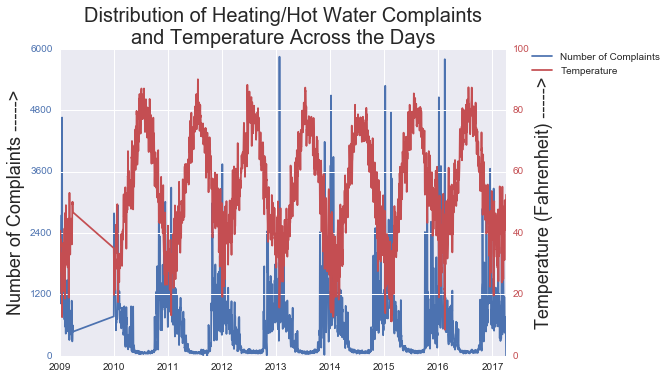

In [6]:
#Distribution of Heating/Hot Water Complaints and Temperature across the days

heating_complaints_temp = pd.read_csv('../res_use_cases/heating_complaints_temp.out', names = ["date", "num_complaints", "temp", "state"])
heating_complaints_temp['date'] = pd.to_datetime(heating_complaints_temp['date'], format='%Y%m%d').dt.date

fig, ax1 = plt.subplots()  

title = ('Distribution of Heating/Hot Water Complaints'
         '\nand Temperature Across the Days')
plt.title(title, fontsize=20)

g1 = ax1.plot(heating_complaints_temp.date, heating_complaints_temp.num_complaints, 'b', label='Number of Complaints')

ax1.set_ylabel('Number of Complaints ----->', fontsize=18)
ax1.set_ylim(0, 6000)
for i in ax1.get_yticklabels():
    i.set_color('b')

ax2 = ax1.twinx()
g2 = ax2.plot(heating_complaints_temp.date, heating_complaints_temp.temp, 'r', label='Temperature')

ax2.set_ylabel('Temperature (Fahrenheit) ----->', fontsize=18)
ax2.set_ylim(0, 100)
for i in ax2.get_yticklabels():
    i.set_color('r')
  
lines = g1 + g2
ax1.legend(lines, [l.get_label() for l in lines], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax1.set_yticks(np.linspace(ax1.get_ybound()[0], ax1.get_ybound()[1], 6))
ax2.set_yticks(np.linspace(ax2.get_ybound()[0], ax2.get_ybound()[1], 6))

plt.show()

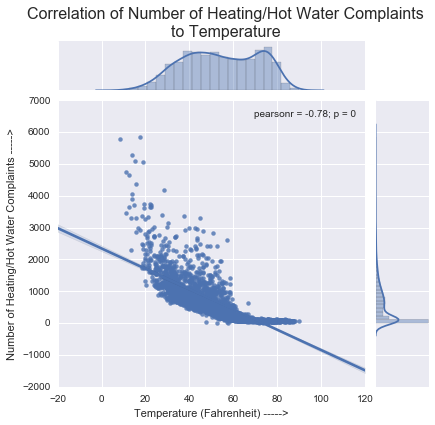

In [7]:
#Correlation plot of Number of Heating/Hot Water Complaints to Temperature
title = ('Correlation of Number of Heating/Hot Water Complaints'
         '\nto Temperature')
g = sns.jointplot(x="temp", y="num_complaints", data=heating_complaints_temp, kind='reg')
g.fig.suptitle(title, fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.ax_joint.set_xlabel("Temperature (Fahrenheit) ----->")
g.ax_joint.set_ylabel("Number of Heating/Hot Water Complaints ----->")